In [192]:
# ライブラリ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut, cross_val_score, KFold, RepeatedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline

In [160]:
# データ準備
boston_df = pd.read_csv('../data/BostonHousing.csv')


問題1: 線形回帰を使用して、アイリスデータセットの「花びらの長さ」を予測するモデルを訓練してください。入力変数としては、「がく片の長さ」、「がく片の幅」、「花びらの幅」を使用してください。訓練が完了したら、モデルのcoef_属性を表示して、各特徴量の係数を確認してください。

In [3]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
y_col = 'petal_length'
X = df.drop(df[[y_col, 'species']], axis=1)
y = df[y_col]

# 学習
model = LinearRegression()
model.fit(X, y)

model_coef = model.coef_
model_intercept = model.intercept_
print(f'傾き : {model_coef} 切片 : {model_intercept}')

傾き : [ 0.72913845 -0.64601244  1.44679341] 切片 : -0.26271119757417916


問題2: ボストンの住宅価格データセットを使用して、住宅価格の中央値（MEDV）を予測する線形回帰モデルを訓練してください。すべての特徴量を使用し、モデルが訓練されたら、その係数と切片を表示してください。

In [11]:
df = pd.read_csv('../data/BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [26]:
y_col = 'medv'
X = df.drop(df[[y_col]], axis=1)
y = df[y_col].values
model = LinearRegression()
model.fit(X, y)
print(f'係数 : {model.coef_}, 切片 : {model.intercept_}')

係数 : [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01], 切片 : 36.459488385089884


問題3: ワインのデータセットの特徴量を標準化してください。



In [29]:
from sklearn.datasets import load_wine
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [37]:
# print(wine.DESCR)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(wine.data)

問題4: 先ほど標準化したワインのデータセットを使用して、線形回帰モデルを訓練してください。目的変数として、alcohol（アルコール度数）を使用します。モデルが訓練されたら、その係数と切片を表示してください

In [57]:
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
y_col = 'alcohol'
X = wine_df.loc[:, wine_df.columns!=y_col]
y = wine_df[y_col]

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 学習
model = LinearRegression()
model.fit(X_scaled, y)

# 係数と切片
print(f'係数 :{model.coef_}, 切片 : {model.intercept_}')


係数 :[ 1.46643229e-01  3.77129289e-02 -1.25839490e-01  5.95201781e-05
  3.25048361e-02  9.08909123e-03 -2.57881239e-02 -8.70375975e-02
  3.76898252e-01  4.94330970e-02  1.13842711e-01  3.19001837e-01], 切片 : 13.00061797752809


0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 178, dtype: float64

問題5: タイタニックのデータセットを使用し、以下の手順に従ってデータの前処理を行ってください。
タイタニックのデータセットをロードします。
Sex（性別）カラムをダミー変数に変換してください。
Embarked（乗船地）カラムをone-hotエンコーディングで変換してください。
変換後のデータフレームの最初の5行を表示してください。


In [77]:
titanic_df = sns.load_dataset('titanic')
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [80]:
titanic_df_dummies = pd.get_dummies(titanic_df, drop_first=True)
titanic_df_dummies


,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,0,3,22.0,1,0,7.2500,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,1,1,38.0,1,0,71.2833,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
2,1,3,26.0,0,0,7.9250,False,True,False,False,...,True,False,False,False,False,False,False,False,True,True
3,1,1,35.0,1,0,53.1000,False,False,False,False,...,True,False,True,False,False,False,False,False,True,True
4,0,3,35.0,0,0,8.0500,True,True,True,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,True,True,False,...,False,False,False,False,False,False,False,False,True,False
887,1,1,19.0,0,0,30.0000,False,True,False,False,...,True,True,False,False,False,False,False,False,True,True
888,0,3,NaN,1,2,23.4500,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
889,1,1,26.0,0,0,30.0000,True,True,True,False,...,False,False,True,False,False,False,False,False,False,True


In [74]:
titanic_df

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [83]:
titanic_df_dummies = pd.get_dummies(titanic_df, columns=['sex', 'embarked'], drop_first=True)
titanic_df_dummies.head()

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,True,False,True
1,1,1,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,False,False,False
2,1,3,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,False,False,True
3,1,1,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,False,False,True
4,0,3,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,True,False,True


問題6: Hold-out
タイタニックのデータセットを使用して、データを訓練データとテストデータに分割してください。テストデータの割合は30%としてください。

In [89]:
titanic_df = sns.load_dataset('titanic')
titanic_df_dummies = pd.get_dummies(titanic_df, columns=['sex', 'embarked'], drop_first=True)
X = titanic_df_dummies[['age', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']]
y = titanic_df['survived']
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

問題7: LOOCV
タイタニックのデータセットを使用して、Leave-One-Out Cross-Validationの評価を行ってください。モデルとしてはロジスティック回帰を使用してください。最終的に平均のスコアを表示してください。

In [108]:
titanic_df = sns.load_dataset('titanic')
titanic_df = titanic_df.dropna()
titanic_df_dummies = pd.get_dummies(titanic_df, columns=['sex', 'embarked'], drop_first=True)

X = titanic_df_dummies[['age', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']]
y = titanic_df['survived']

model = LogisticRegression()
cv = LeaveOneOut()
scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')

print(f'MSE : {np.abs(np.mean(scores))}')

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [107]:
print(f'MSE : {np.abs(np.mean(scores))}')

MSE : 0.25274725274725274


age           0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

問題8: k-fold CV（k-分割交差検証）

タイタニックのデータセットを使用して、k-fold交差検証の評価を行ってください。モデルとしてはロジスティック回帰を使用し、
k=5（データセットを5つのフォールドに分割）で実施してください。最終的に各フォールドのスコアの平均を表示してください。

In [111]:
titanic_df = sns.load_dataset('titanic')
titanic_df = titanic_df.dropna()
titanic_df_dummies = pd.get_dummies(titanic_df, columns=['sex', 'embarked'], drop_first=True)

X = titanic_df_dummies[['age', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']]
y = titanic_df['survived']

model = LogisticRegression()
cv = KFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')

MSE = np.abs(np.mean(scores))
print(f'MSE : {MSE}')


MSE : 0.2480480480480481


問題9: Repeated k-fold CV（繰り返しk-分割交差検証）

タイタニックのデータセットを使用して、Repeated k-fold交差検証の評価を行ってください。モデルとしてはロジスティック回帰を使用し、
k=5（データセットを5つのフォールドに分割）で、5回の繰り返しを実施してください。最終的に全繰り返しのスコアの平均を表示してください。

In [157]:
titanic_df = sns.load_dataset('titanic')
titanic_df = titanic_df.dropna()
titanic_df_dummies = pd.get_dummies(titanic_df, columns=['sex', 'embarked'], drop_first=True)

X = titanic_df_dummies[['age', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']]
y = titanic_df['survived']

k = 5
n_repeats = 5
mse_list =[]
cv = RepeatedKFold(n_splits=k, n_repeats=n_repeats, random_state=0)
for train_index, test_index in cv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = LogisticRegression()
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

print(f'MSE : {np.mean(mse_list)}')

KeyError: "None of [Index([  0,   1,   2,   3,   6,   9,  10,  11,  12,  13,\n       ...\n       167, 169, 171, 172, 173, 174, 175, 176, 178, 180],\n      dtype='int64', length=145)] are in the [columns]"

In [118]:
# 訂正版
titanic_df = sns.load_dataset('titanic')
titanic_df = titanic_df.dropna()
titanic_df_dummies = pd.get_dummies(titanic_df, columns=['sex', 'embarked'], drop_first=True)

X = titanic_df_dummies[['age', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']].values
y = titanic_df['survived'].values

k = 5
n_repeats = 5
mse_list =[]
cv = RepeatedKFold(n_splits=k, n_repeats=n_repeats, random_state=0)
for train_index, test_index in cv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

print(f'MSE : {np.mean(mse_list)}')

MSE : 0.2530630630630631


問題10: ボストンの住宅価格データセットを使用して、以下の手順に従ってください。

ボストンの住宅価格データセットをロードします。
全ての特徴量を使用して線形回帰モデルを訓練します。目的変数はMEDV（住宅価格の中央値）とします。
モデルの評価を以下の指標で行います：
MSE（平均二乗誤差）
RMSE（平均二乗誤差の平方根）
MAE（平均絶対誤差）
 （決定係数）
調整済み決定係数
 
上記の指標を計算して表示してください。
データを訓練データとテストデータに分割してください。テストデータの割合は30%として、その上で訓練データでモデルを訓練し、テストデータで評価を行う形にしてください。

In [120]:
# データ準備
df = pd.read_csv('../data/BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [121]:
# データの確認
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [126]:
# 欠損値確認
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [155]:
from sklearn.metrics import mean_absolute_error, r2_score

num_features = len(X.columns)
def adjusted_r2_score(y_test, y_pred, num_features):
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    adjusted_r2 = 1 - ((1 - r2)*(n-1)) / (n-num_features-1)
    return adjusted_r2

y_col = 'medv'
X = df.drop(df[['medv']], axis=1)
y = df[y_col]

# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 学習
model = LinearRegression()
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)

# 評価
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = adjusted_r2_score(y_test, y_pred, num_features)

print(f'MSE : {mse}')
print(f'RMSE : {rmse}')
print(f'MAE : {mae}')
print(f'R2 : {r2}')
print(f'adg_R2 : {adjusted_r2}')



MSE : 27.195965766883415
RMSE : 5.214975145375423
MAE : 3.6099040603818233
R2 : 0.6733825506400171
adg_R2 : 0.6426142401930621


In [147]:
print(len(y_test))
print(len(X.columns))

152
13


In [136]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.10769230769230753

問題11: 多項式特徴量

ボストンの住宅価格データセットを使用して、特徴量LSTAT（低所得者の割合）の2次の多項式特徴量を生成してください。
生成した多項式特徴量を使って、線形回帰モデルを訓練し、予測を行ってください。
実際のLSTATの値と予測されたMEDV（住宅価格の中央値）をプロットして、2次の曲線が得られているか確認してください。

In [161]:
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


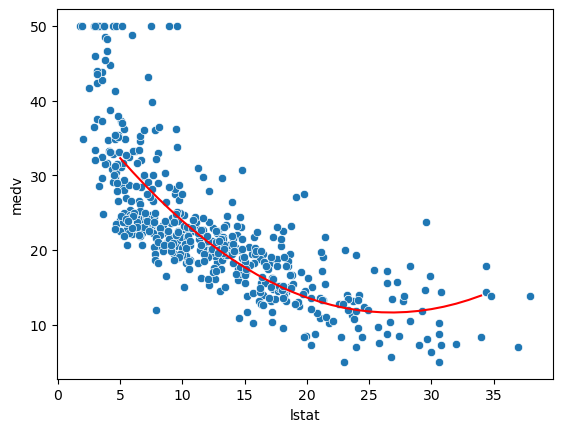

In [196]:
# ライブラリ
X = boston_df['lstat'].values.reshape(-1 ,1)
y = boston_df['medv'].values

# 多項式特徴量
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, include_bias=False)
X_poly = poly.fit_transform(X)

# 学習
model = LinearRegression()
model.fit(X_poly, y)

# プロット
sns.scatterplot(x=df['lstat'], y=df['medv'])
x_axis = np.arange(5, 35).reshape(-1, 1)
x_axis_ = poly.transform(x_axis)
y_pred = model.predict(x_axis_)
plt.plot(x_axis, y_pred, 'r')

問題12: KNN回帰

ボストンの住宅価格データセットを使用して、KNN回帰モデルを訓練してください。特徴量はLSTATのみ、目的変数はMEDVとします。

K=3 でKNN回帰モデルを訓練し、予測を行ってください。
実際のLSTATの値と予測されたMEDVをプロットして、KNN回帰の結果が得られているか確認してください。